In [16]:
!pip install PubChemPy
!pip install rdkit
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [19]:
df = pd.read_csv('/content/gdrive/MyDrive/Allergenicity Prediction/dataset-toksisitas-amino.csv')

In [20]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,seq,label,Phe,Leu,Ile,Met,Val,...,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,0,0,sp|P24846|DAPA1_WHEAT,MPYLQPPRPHPHPHPTSRLSRASPPSPFPFFPAGTSRSGRLQPVPV...,nonallergen,3.608247,8.247423,5.412371,2.57732,8.247423,...,3.608247,1.804124,4.381443,4.123711,4.123711,5.670103,1.288660,1.030928,5.412371,8.762887
1,1,1,sp|O75882|ATRN_HUMAN,MVAAAAATEARLRRRTAATAALAGRSGGPHWDWDVTRAGRPGLGAG...,nonallergen,4.128761,7.837649,3.778866,2.09937,5.668300,...,2.939118,3.638908,6.088174,4.338698,4.548635,4.548635,6.158153,2.169349,4.758572,7.347796


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4854 non-null   int64  
 1   Unnamed: 0.1  4854 non-null   int64  
 2   id            4854 non-null   object 
 3   seq           4854 non-null   object 
 4   label         4854 non-null   object 
 5   Phe           4854 non-null   float64
 6   Leu           4854 non-null   float64
 7   Ile           4854 non-null   float64
 8   Met           4854 non-null   float64
 9   Val           4854 non-null   float64
 10  Ser           4854 non-null   float64
 11  Pro           4854 non-null   float64
 12  Thr           4854 non-null   float64
 13  Ala           4854 non-null   float64
 14  Tyr           4854 non-null   float64
 15  His           4854 non-null   float64
 16  Gln           4854 non-null   float64
 17  Asn           4854 non-null   float64
 18  Lys           4854 non-null 

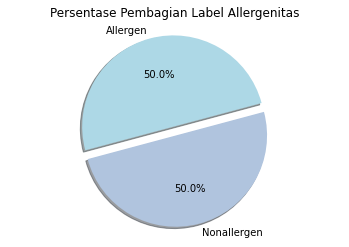

In [22]:
Tasks = [len(df[df['label']=='allergen']),len(df[df['label']=='nonallergen'])]

my_labels = ['Allergen','Nonallergen']
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Persentase Pembagian Label Allergenitas')
plt.axis('equal')
plt.show()

In [23]:
feature = ['Phe', 'Leu', 'Ile', 'Met', 'Val', 'Ser', 'Pro', 'Thr', 'Ala', 'Tyr', 'His', 'Gln', 'Asn', 'Lys', 'Asp', 'Glu', 'Cys', 'Trp', 'Arg', 'Gly']
X = df[feature]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [24]:
"""
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
"""
X_train_std = X_train
X_test_std = X_test

In [25]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [26]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.788


In [27]:
def protein_extract(PRO,tipe):
    gen = PRO.lower()
    cod = [gen[i:i+1] for i in range(0,len(gen),1)]
    if(tipe == "protein"):
      for j in range(0,len(cod)):
        phe = cod.count('f')
        leu = cod.count('l')
        ile = cod.count('i')
        met = cod.count('m')
        val = cod.count('v')
        ser = cod.count('s')
        pro = cod.count('p')
        thr = cod.count('t')
        ala = cod.count('a')
        tyr = cod.count('y')
        his = cod.count('h')
        gln = cod.count('q')
        asn = cod.count('n')
        lys = cod.count('k')
        asp = cod.count('d')
        glu = cod.count('e')
        cys = cod.count('c')
        trp = cod.count('w')
        arg = cod.count('r')
        gly = cod.count('g')
    	
      protein = {"Phe":(phe/len(cod))*100,"Leu":(leu/len(cod))*100,"Ile":( ile/len(cod))*100,"Met":(met/len(cod))*100,"Val" :( val/len(cod))*100,"Ser":( ser/len(cod))*100,"Pro":(pro/len(cod))*100,"Thr":(thr/len(cod))*100,"Ala":(ala/len(cod))*100,"Tyr":(tyr/len(cod))*100,"His":(his/len(cod))*100,"Gln":(gln/len(cod))*100,"Asn":(asn/len(cod))*100,"Lys":(lys/len(cod))*100,"Asp":(asp/len(cod))*100,"Glu":(glu/len(cod))*100,"Cys":(cys/len(cod))*100,"Trp":(trp/len(cod))*100,"Arg":(arg/len(cod))*100,"Gly":(gly/len(cod))*100,"Length":len(cod),"description":""}
        
      return protein
    else:
      return "this function only for protein data"

In [28]:
dtest = df[df['label']=='allergen']

dtest[feature]

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
4,4.402516,5.660377,7.547170,0.628931,9.433962,5.660377,5.031447,5.031447,6.918239,4.402516,2.515723,1.257862,6.918239,9.433962,5.031447,8.805031,0.628931,0.000000,1.886792,8.805031
5,2.040816,9.523810,4.761905,2.721088,5.442177,7.482993,2.721088,4.761905,8.843537,2.721088,1.360544,0.680272,8.843537,5.442177,4.761905,1.360544,6.122449,4.081633,6.802721,9.523810
8,3.802281,5.323194,4.182510,1.140684,7.604563,6.083650,6.844106,6.844106,6.844106,3.802281,1.520913,0.760456,2.661597,10.266160,6.463878,6.844106,2.661597,2.281369,2.281369,11.787072
9,2.409639,3.614458,8.433735,4.819277,10.843373,7.228916,10.843373,3.614458,9.638554,1.204819,0.000000,1.204819,2.409639,6.024096,4.819277,8.433735,0.000000,1.204819,6.024096,7.228916
10,2.252252,4.054054,9.009009,1.801802,6.756757,5.855856,2.702703,4.504505,9.459459,7.207207,2.702703,6.756757,7.657658,0.900901,5.855856,5.405405,3.153153,1.351351,4.504505,8.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,4.214559,7.279693,5.363985,3.256705,8.237548,5.747126,6.513410,4.980843,9.578544,4.406130,1.532567,2.681992,2.681992,6.513410,5.172414,3.639847,1.340996,2.107280,5.363985,9.386973
4847,1.428571,4.761905,7.619048,0.476190,6.666667,7.619048,3.809524,5.714286,6.666667,7.142857,3.333333,7.619048,5.714286,0.952381,5.238095,4.285714,3.333333,1.904762,6.666667,9.047619
4848,4.807692,11.057692,7.692308,2.403846,3.365385,3.365385,4.326923,3.365385,4.807692,4.807692,4.807692,4.326923,3.846154,8.653846,8.653846,5.769231,1.923077,0.480769,5.288462,6.250000
4852,1.986755,7.284768,3.973510,3.311258,9.271523,5.298013,3.973510,7.947020,6.622517,3.311258,1.986755,3.973510,5.298013,7.284768,6.622517,7.284768,3.973510,0.000000,2.649007,7.947020


In [29]:
testo = svc.predict(dtest[feature])
benar = 0
salah = 0
for i in range(0,len(dtest[feature])):
  if(testo[i]=='allergen'):
    benar += 1
  if(testo[i]=='nonallergen'):
    salah += 1

print("benar : ",benar)
print("persentase benar : ",(benar/len(dtest[feature]))*100)
print("salah : ",salah)

benar :  1850
persentase benar :  76.22579316028019
salah :  577


In [30]:
import pickle

# save the model to disk
filename = '/content/gdrive/MyDrive/Allergenicity Prediction/klasifikasi-allergenitas-svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [31]:
import pickle

# save the model to disk
filename = '/content/klasifikasi-allergenitas-svm.pkl'
pickle.dump(svc, open(filename, 'wb'))